# Linear Regression with One Variable

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. The file **ex1data1.txt** (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [8]:
# !pip install matplotlib

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('ex1data1.txt', header=None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plot Dataset using scatter to visualize the pattern in it

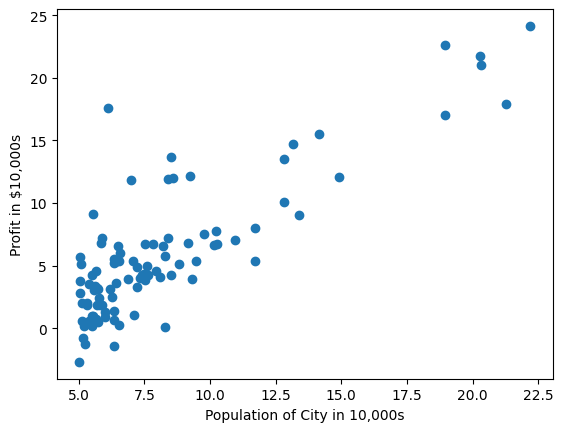

In [42]:
# Plot Data
plt.scatter(X, y)

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Add Intercept and Parameters initilization

we add another dimension to our data to accommodate the intercept term (the reason for doing this is explained in the videos). We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01.

In [43]:
#### DONT CHANGE THIS CODE ####
X = np.array(X)
y = np.array(y)
X = X[:,np.newaxis]
y = y[:,np.newaxis]
# Hyperparameters
iterations = 1500
alpha = 0.01

In [44]:
## Write the code ##
# Initlize Parameters () to ZERO

# Initilize one to be multiplied with intercept

# Stack ones withe actual data set as it will look like following output.
X = np.hstack((np.ones((m, 1)), X))
theta = np.zeros((2, 1))

In [45]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [46]:
theta # Intialized Theta should be ZERO.

array([[0.],
       [0.]])

### COST FUNCTION ####
Implement the MSE cost function for above mentioned dataset. The formula is as followed.
![Mean_Squared_Error](res/MSE.png "MSE")


In [47]:
def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost

In [48]:
# Initial Cost
J = computeCost(X, y, theta)
print(J)

32.072733877455676


### Finding the optimal parameters using Gradient Descent¶
The Paritial Derivative of the Cost function is: 
![derivatives](res/derivatives.png "MSE")

In [49]:
### WRITE CODE HERE ###
# NOTE:- According to passed parameters .
# Hint:- Don't Directly update the actual theta but use temp variable during update.

def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print("Theta:", theta)

Theta: [[-3.63029144]
 [ 1.16636235]]


Expected theta values [-3.6303, 1.1664]



In [50]:
# Calculate the Cost after converging of thetas for number of iterations.
J = computeCost(X, y, theta)
print("Final Cost:", J)

Final Cost: 4.483388256587725


### Plot showing the best fit line¶


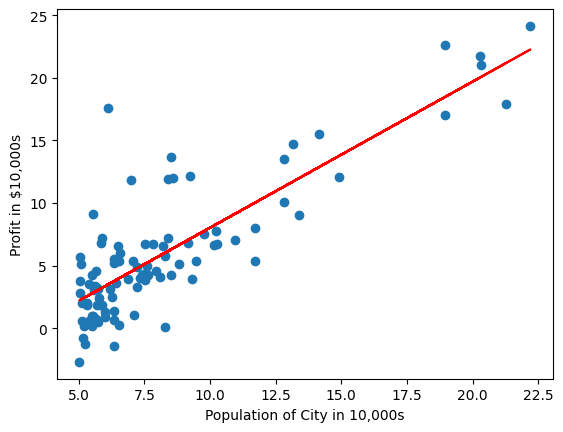

In [51]:
plt.scatter(X[:, 1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:, 1], np.dot(X, theta), color='red')
plt.savefig('graph.png')
plt.show()

## Linear Regression with Multiple Predictors (Variable)

**Problem context:** Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.


The first column is the **size of the house (in square feet)**, the second column is the **number of bedrooms**, and the third column is the **price** of the house.

In [71]:
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
X = data.iloc[:,0:2] # read first two columns into X
y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [72]:
X.head(5)

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [73]:
y.head(5)

0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64

## Feature Scaling and Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.


Feature Scaling can be performed with following steps.
1. Subtract the mean value of each feature from the dataset.
1. After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

### Apply the Z-Score Scaling the features. And use following Z-Score Scaling foru
![scaling](res/scaling.png "MSE")

In [74]:
# Z-score normalization for each column independently
X_scaled = (X - X.mean()) / X.std()

# Print the scaled X for verification
print("Scaled X:\n", X_scaled)

Scaled X:
            0         1
0   0.130010 -0.223675
1  -0.504190 -0.223675
2   0.502476 -0.223675
3  -0.735723 -1.537767
4   1.257476  1.090417
5  -0.019732  1.090417
6  -0.587240 -0.223675
7  -0.721881 -0.223675
8  -0.781023 -0.223675
9  -0.637573 -0.223675
10 -0.076357  1.090417
11 -0.000857 -0.223675
12 -0.139273 -0.223675
13  3.117292  2.404508
14 -0.921956 -0.223675
15  0.376643  1.090417
16 -0.856523 -1.537767
17 -0.962223 -0.223675
18  0.765468  1.090417
19  1.296484  1.090417
20 -0.294048 -0.223675
21 -0.141790 -1.537767
22 -0.499157 -0.223675
23 -0.048673  1.090417
24  2.377392 -0.223675
25 -1.133356 -0.223675
26 -0.682873 -0.223675
27  0.661026 -0.223675
28  0.250810 -0.223675
29  0.800701 -0.223675
30 -0.203448 -1.537767
31 -1.259189 -2.851859
32  0.049477  1.090417
33  1.429868 -0.223675
34 -0.238682  1.090417
35 -0.709298 -0.223675
36 -0.958448 -0.223675
37  0.165243  1.090417
38  2.786350  1.090417
39  0.202993  1.090417
40 -0.423657 -1.537767
41  0.298626 -0.223675


In [75]:
### WRITE CODE HERE ###
# In above features add a column of ones in dataset for intercept term.
X_scaled_with_intercept = np.c_[np.ones((m, 1)), X_scaled]

# Print the modified dataset
print("Features with intercept term (first few rows):")
print(X_scaled_with_intercept[:5])


Features with intercept term (first few rows):
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]


In [76]:
# Hyperparamters. Don't change there for submission
alpha = 0.01
num_iters = 400
y = np.array(y)
y = y[:,np.newaxis]


In [77]:
# Initialize Thetas to zero
n_features = X_scaled_with_intercept.shape[1]  # Number of features including intercept
theta = np.zeros((n_features, 1))

# Print initialized Thetas
print("Initialized Thetas (zeros):")
print(theta)

Initialized Thetas (zeros):
[[0.]
 [0.]
 [0.]]


In [78]:
# Complete cost function for more than one input features
def computeCostMulti(X, y, theta):
    m = len(y)  # Number of training samples
    predictions = X @ theta  # Predictions for all samples
    errors = predictions - y  # Difference between predictions and actual values
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # Compute the cost
    return J

# Example usage
J = computeCostMulti(X_scaled_with_intercept, y, theta)
print(J)

65591548106.45744


In [79]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training samples
    for i in range(iterations):
        predictions = X @ theta  # Calculate predictions
        errors = predictions - y  # Calculate the errors
        gradient = (1 / m) * (X.T @ errors)  # Compute the gradient
        theta -= alpha * gradient  # Update the parameters
    return theta

# Ensure you are using X_scaled_with_intercept (with intercept term)
theta = np.zeros((X_scaled_with_intercept.shape[1], 1))  # Initialize theta to zero with the correct shape
theta = gradientDescentMulti(X_scaled_with_intercept, y, theta, alpha, num_iters)
print("Updated Theta values after Gradient Descent:")
print(theta)

Updated Theta values after Gradient Descent:
[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


In [80]:
new_data = np.array([1, 2000, 3])  # [1, square footage, number of bedrooms]
predicted_price = new_data @ theta
print(f"Predicted price: {predicted_price[0]}")


Predicted price: 200519554.7210389


In [ ]:
# Min-Max normalization function
def min_max_normalize(X):
    return (X - X.min()) / (X.max() - X.min())

# Read data from file
data = pd.read_csv('ex1data2.txt', sep=',', header=None)

# Assign columns for X (features) and y (target)
X = data.iloc[:, 0:2]  # First two columns
y = data.iloc[:, 2]    # Third column
m = len(y)             # Number of training samples

# Apply Min-Max normalization to X
X_scaled1 = min_max_normalize(X)

# Add a column of ones for the intercept term
X_scaled1_with_intercept = np.c_[np.ones((m, 1)), X_scaled1]

# Ensure y is a column vector (2D array with shape (m, 1))
y = y.values.reshape(-1, 1)

# Initialize theta
theta = np.zeros((X_scaled1_with_intercept.shape[1], 1))

# Hyperparameters
alpha = 0.01
iterations = 400

# Gradient Descent function
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training samples
    for i in range(iterations):
        predictions = X @ theta  # Calculate predictions
        errors = predictions - y  # Calculate the errors
        gradient = (1 / m) * (X.T @ errors)  # Compute the gradient
        theta -= alpha * gradient  # Update the parameters
    return theta

In [84]:
# gradient descent with Min-Max normalized features
theta = gradientDescentMulti(X_scaled1_with_intercept, y, theta, alpha, iterations)

# Print the updated theta values
print("Updated Theta values after Gradient Descent with Min-Max Normalization:")
print(theta)

Updated Theta values after Gradient Descent with Min-Max Normalization:
[[225422.61458395]
 [134845.36654335]
 [138622.10096074]]


In [86]:
J = computeCostMulti(X_scaled1_with_intercept, y, theta)
print(J)

4330735103.195994
